<a href="https://colab.research.google.com/github/imahrukh/AI2002/blob/main/labs/lab7/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# the activation function (Step function)
def activation(x):
    return 1 if x >= 0 else 0

# Perceptron training function
def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(2)  # Initialize weights to zero
    bias = 0  # Initialize bias to zero

    for epoch in range(epochs):
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            y_pred = activation(linear_output)

            error = y[i] - y_pred  # Calculate error

            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

# Perceptron prediction function
def predict(X, weights, bias):
    predictions = []
    for x in X:
        linear_output = np.dot(x, weights) + bias
        predictions.append(activation(linear_output))
    return predictions

# Training data for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Train perceptron for OR gate
weights_or, bias_or = train_perceptron(X_or, y_or)
print("OR Gate Predictions:", predict(X_or, weights_or, bias_or))

# Train perceptron for AND gate
weights_and, bias_and = train_perceptron(X_and, y_and)
print("AND Gate Predictions:", predict(X_and, weights_and, bias_and))

OR Gate Predictions: [0, 1, 1, 1]
AND Gate Predictions: [0, 0, 0, 1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
df = pd.read_csv("horseRacing.csv")
print("Initial Data: ")
print(df)

Initial Data: 
       race_id  horse_id  1-101  1-102  1-103  1-104  1-105  1-106  1-107  \
0       495886    565129    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1       495886    607093    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2       495886    637337    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3       495886    659819    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4       495886    661530    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...       ...    ...    ...    ...    ...    ...    ...    ...   
38967   573221    734159  -0.19  -0.19  -0.16   0.10  -0.15  -0.04  -0.50   
38968   573221    752769  -0.31  -0.33  -0.35  -0.50  -0.37  -0.51  -0.24   
38969   573221    771998  -0.32  -0.27  -0.36  -0.56  -0.37  -0.64  -0.50   
38970   573221    774497  -0.32  -0.37  -0.45  -0.59  -0.39  -0.68  -0.49   
38971   573221    787397  -0.31  -0.25  -0.40  -0.63  -0.39  -0.85  -0.77   

       1-108  ...  3-132  4-105  4-109  4-110  4-114  4-115 

In [ ]:
#clean dataset
print("Missing values:")
print(df.isnull().sum())

df = df.fillna(0, inplace = True)
print(df)

Missing values:
race_id              0
horse_id             0
1-101            25685
1-102            25654
1-103            25669
                 ...  
4-115             4108
4-116             4670
4-117             3776
calc_position        5
price                1
Length: 64, dtype: int64
None


In [ ]:
#convert labels into 0 or 1
df ['calc_position'] = df['calc_position'].apply (lambda x: 1 if x==1 else 0)


TypeError: 'NoneType' object is not subscriptable

ValueError: Could not interpret value `calc_position` for `x`. Value is a string, but `data` was not passed.

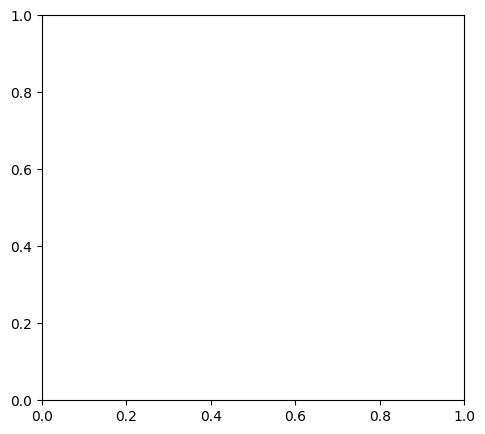

In [ ]:
#plotting statistics
plt.figure(figsize=(12, 5))
sns.countplot(x='calc_position', data=df)
plt.title("Winners Distribution")
plt.show()


In [ ]:
#identifying problems with dataset
print("Dataset info:")
print(df.info())

print("Summary Statistics:")
print(df.describe())

Dataset info:


AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
df = pd.get_dummies(df, columns=['race_id'],prefix ='Race')
print(df)

In [ ]:
df = pd.get_dummies(df, columns=['horse_id'],prefix ='Race')
print(df)

In [ ]:
df.to_csv("cleaned_dataset.csv", index= False)
print("cleaned dataset saved in .csv file")